<a href="https://colab.research.google.com/github/hmck8625/first/blob/master/min_pop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

n= 0 N= 10000 呼損回数 0
呼損率: 0.0 %
n= 1 N= 10000 呼損回数 0
呼損率: 0.0 %
n= 2 N= 10000 呼損回数 0
呼損率: 0.0 %
n= 3 N= 10000 呼損回数 0
呼損率: 0.0 %
n= 4 N= 10000 呼損回数 0
呼損率: 0.0 %
n= 5 N= 10000 呼損回数 0
呼損率: 0.0 %
n= 6 N= 10000 呼損回数 0
呼損率: 0.0 %
n= 7 N= 10000 呼損回数 2
呼損率: 0.02 %
n= 8 N= 10000 呼損回数 4
呼損率: 0.04 %
n= 9 N= 10000 呼損回数 21
呼損率: 0.21 %
n= 10 N= 10000 呼損回数 21
呼損率: 0.21 %
n= 11 N= 10000 呼損回数 57
呼損率: 0.5700000000000001 %
n= 12 N= 10000 呼損回数 110
呼損率: 1.0999999999999999 %
n= 13 N= 10000 呼損回数 179
呼損率: 1.79 %
n= 14 N= 10000 呼損回数 327
呼損率: 3.27 %
n= 15 N= 10000 呼損回数 475
呼損率: 4.75 %
n= 16 N= 10000 呼損回数 673
呼損率: 6.7299999999999995 %
n= 17 N= 10000 呼損回数 869
呼損率: 8.690000000000001 %
n= 18 N= 10000 呼損回数 1119
呼損率: 11.19 %
n= 19 N= 10000 呼損回数 1413
呼損率: 14.13 %
n= 20 N= 10000 呼損回数 1705
呼損率: 17.05 %
n= 21 N= 10000 呼損回数 1861
呼損率: 18.61 %
n= 22 N= 10000 呼損回数 2083
呼損率: 20.830000000000002 %
n= 23 N= 10000 呼損回数 2305
呼損率: 23.05 %
n= 24 N= 10000 呼損回数 2600
呼損率: 26.0 %
n= 25 N= 10000 呼損回数 2743
呼損率: 27.43 %
n= 26 N= 10000 呼損回数

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65285 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_

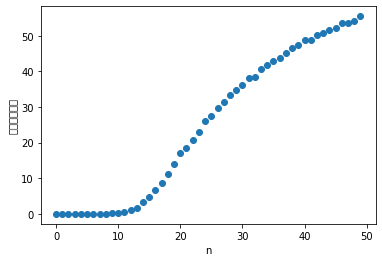

In [19]:
"""
最大路 要求

二次元リストからインデックスを取り出す
https://teratail.com/questions/118545
"""

import numpy as np
import scipy.sparse as ss
from scipy.sparse import csr_matrix
import pprint
import random
import matplotlib.pyplot as plt
#########################送受信ノードの決定###############################
def path_decide():
  nord = [0,1,2,3,4,5,6,7,8,9]
  num = random.sample(nord,2)
  start,end = num[0],num[1]
  return start,end
############################最短経路の取得############################
def get_path(start, goal, pred):
    return get_path_row(start, goal, pred[start])

def get_path_row(start, goal, pred_row):
    path = []
    i = goal
    while i != start and i >= 0:
        path.append(i)
        i = pred_row[i]
    if i < 0:
        return []
    path.append(i)
    return path[::-1]
############################最短経路の取得############################
def default_shotest_route(l):#(行、列)=(i,j)に最短格納されてる
  path_list = []
  d,p = ss.csgraph.dijkstra(l,return_predecessors=True,unweighted=True)
  for start in range(10):
    line_path_list = []
    for end in range(10):
      start = start #リストのインデックスに合わせてる
      end = end
      line_path_list.append(get_path(start,end,p))
    path_list.append(line_path_list)
  return path_list
 ############################最短最大路を返す############################
def minimum_large_path(start,end,l):
  rinsetu  = np.zeros((10,10))
  for k in range(5,0,-1): #pathに最短最大路の経路が入ってる
    useable_link = np.argwhere(l == k)#今使える路を格納
    for i,j in useable_link:#risetuの利用可能リンクを１にして現在の隣接行列を生成
      rinsetu[i][j] = 1
    
    #現在の隣接行列で最短最大路があるか探索
    default_path_list = default_shotest_route(rinsetu)#現在の隣接行列での最短最大路があれば格納されている
    path = default_path_list[start][end]
    if path == [] and k != 1:#空リストつまり現在のリンクではつながらなかった時
      #print("ちょっと経路ないわ、今の重み：",k)
      pass
    if path == [] and k == 1:#k=0までいった（最後まで行ったときに）つながらなかった時（経路が存在しなかった時）
      #print("まじで経路ないわ、今の重み：",k)
      path = 'FAIL'
      #rinsetu  = np.zeros((10,10))#初期化
      break
  return path

############################通信の確立############################
def comm(l,path,path_list):
  global count
  l_copy = l
  if path == 'FAIL':
    path_list.append(path)
    count += 1
    return 0
  else:
    for i in range(len(path)-1):#該当している辺の重みを－１する箇所
      pre_node,now_node = path[i],path[i+1] 
  #容量が開いていた場合、そのリンクの容量を1減らす
      l_copy[pre_node][now_node] -= 1
      l_copy[now_node][pre_node] -= 1
    l = l_copy #最後まで行けたらlを更新
    path_list.append(path)
    #print("success")

   ############################通信の切断############################
def suspend(path_list,l):
  l_copy = l
  path = path_list[0]
  if path == 'FAIL':#n回前の通信が失敗してた時
    del path_list[0]
    return 0
  else:
    for i in range(len(path)-1):#該当している辺の重みを+１する箇所
      pre_node,now_node = path[i],path[i+1] 
      l_copy[pre_node][now_node] += 1 
      l_copy[now_node][pre_node] += 1
  l = l_copy #最後まで行けたらlを更新
  del path_list[0]
  return 0


def main(n):
  l = [[0,3,0,3,0,0,0,0,0,0],
      [3,0,3,4,0,0,0,0,0,0],
      [0,3,0,0,4,3,0,0,0,0],
      [3,4,0,0,5,0,0,3,0,0],
      [0,0,4,5,0,5,0,4,0,0],
      [0,0,3,0,5,0,3,0,4,0],
      [0,0,0,0,0,3,0,0,3,0],
      [0,0,0,3,4,0,0,0,4,3],
      [0,0,0,0,0,4,3,4,0,3],
      [0,0,0,0,0,0,0,3,3,0]
      ]
  l = np.array(l)
  path_list = []
  flag = False
  N = 10000
  for i in range(N):
    start,end = path_decide()
    path = minimum_large_path(start,end,l)
    comm(l,path,path_list)
    if len(path_list) > n:
      flag = True
    if flag == True:
      suspend(path_list,l)
  kosonnritu = (count/N)*100

  print("n=",n,"N=",N,"呼損回数",count)
  print("呼損率:",kosonnritu,"%")
  return kosonnritu

count = 0
koson = [] #呼損率を入れる
n = 50
for i in range (n):
  koson.append(main(i))
  count = 0 #関数内でcountはグローバル変数で使ってしまったからここで0に更新しないと別のnになってるのにcountが繰り越されることになる。
x = range(0,n,1)
plt.scatter(x,koson)
plt.xlabel("n")
plt.ylabel("呼損率（％）")
plt.show()

n= 0 N= 10000 呼損回数 0
呼損率: 0.0 %
n= 1 N= 10000 呼損回数 0
呼損率: 0.0 %
n= 2 N= 10000 呼損回数 0
呼損率: 0.0 %
n= 3 N= 10000 呼損回数 27
呼損率: 0.27 %
n= 4 N= 10000 呼損回数 116
呼損率: 1.16 %
n= 5 N= 10000 呼損回数 252
呼損率: 2.52 %
n= 6 N= 10000 呼損回数 394
呼損率: 3.94 %
n= 7 N= 10000 呼損回数 557
呼損率: 5.57 %
n= 8 N= 10000 呼損回数 734
呼損率: 7.340000000000001 %
n= 9 N= 10000 呼損回数 881
呼損率: 8.81 %
n= 10 N= 10000 呼損回数 1089
呼損率: 10.89 %
n= 11 N= 10000 呼損回数 1253
呼損率: 12.53 %
n= 12 N= 10000 呼損回数 1510
呼損率: 15.1 %
n= 13 N= 10000 呼損回数 1651
呼損率: 16.509999999999998 %
n= 14 N= 10000 呼損回数 1752
呼損率: 17.52 %
n= 15 N= 10000 呼損回数 1913
呼損率: 19.13 %
n= 16 N= 10000 呼損回数 2042
呼損率: 20.419999999999998 %
n= 17 N= 10000 呼損回数 2286
呼損率: 22.86 %
n= 18 N= 10000 呼損回数 2364
呼損率: 23.64 %
n= 19 N= 10000 呼損回数 2615
呼損率: 26.150000000000002 %
n= 20 N= 10000 呼損回数 2733
呼損率: 27.33 %
n= 21 N= 10000 呼損回数 2797
呼損率: 27.97 %
n= 22 N= 10000 呼損回数 3029
呼損率: 30.29 %
n= 23 N= 10000 呼損回数 3162
呼損率: 31.619999999999997 %
n= 24 N= 10000 呼損回数 3224
呼損率: 32.24 %
n= 25 N= 10000 呼損回数 3318
呼

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65285 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_

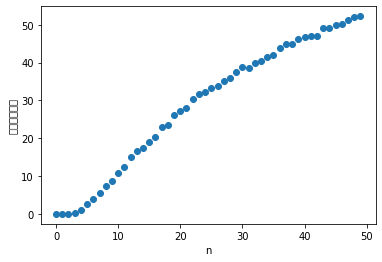

In [18]:
"""
最大路 固定

二次元リストからインデックスを取り出す
https://teratail.com/questions/118545
"""

import numpy as np
import scipy.sparse as ss
from scipy.sparse import csr_matrix
import pprint
import random
import matplotlib.pyplot as plt
#########################送受信ノードの決定###############################
def path_decide():
  nord = [0,1,2,3,4,5,6,7,8,9]
  num = random.sample(nord,2)
  start,end = num[0],num[1]
  return start,end
############################最短経路の取得############################
def get_path(start, goal, pred):
    return get_path_row(start, goal, pred[start])

def get_path_row(start, goal, pred_row):
    path = []
    i = goal
    while i != start and i >= 0:
        path.append(i)
        i = pred_row[i]
    if i < 0:
        return []
    path.append(i)
    return path[::-1]
############################最短最大路の取得############################
def default_shotest_route(l):#(行、列)=(i,j)に最短格納されてる、引数は隣接行列
  path_list = []
  d,p = ss.csgraph.dijkstra(l,return_predecessors=True,unweighted=True)
  for start in range(10):
    line_path_list = []
    for end in range(10):
      start = start #リストのインデックスに合わせてる
      end = end
      line_path_list.append(get_path(start,end,p))
    path_list.append(line_path_list)
  return path_list
 ############################最短最大路を返す############################
def minimum_large_path(start,end,l,default_l):
  rinsetu  = np.zeros((10,10))
  for k in range(5,0,-1): #pathに固定最短最大路の経路が入ってる
    useable_link = np.argwhere(default_l == k)#今使える路を格納。今回は固定なのでdefaultのlを利用する。
    for i,j in useable_link:#risetuの利用可能リンクを１にして現在の隣接行列を生成
      rinsetu[i][j] = 1
    
    #現在の隣接行列で最短最大路があるか探索
    default_path_list = default_shotest_route(rinsetu)#現在の隣接行列での最短最大路があれば格納されている リスト形式でpathが
    path = default_path_list[start][end]
    #固定最短最大路の容量が開いているか判定空いていなければ通信失敗
    if path == [] and k != 1:#空リストつまり現在のリンクではつながらなかった時
      #print("ちょっと経路ないわ、今の重み：",k)
      pass
    if path == [] and k == 1:#k=0までいった（最後まで行ったときに）つながらなかった時（経路が存在しなかった時）
      #print("まじで経路ないわ、今の重み：",k)
      path = 'FAIL'
      #rinsetu  = np.zeros((10,10))#初期化
      break
  return path

############################通信の確立############################
def comm(l,path,path_list):
  global count
  l_copy = l

  if check_commuable(l,path) == False:#容量が足りなかったらpathをＦＡＩＬにしておく
    path = 'FAIL'

  if path == 'FAIL':
    path_list.append(path)
    count += 1
    return 0
  else:
    for i in range(len(path)-1):#該当している辺の重みを－１する箇所
      pre_node,now_node = path[i],path[i+1] 
  #容量が開いていた場合、そのリンクの容量を1減らす
      l_copy[pre_node][now_node] -= 1
      l_copy[now_node][pre_node] -= 1
    l = l_copy #最後まで行けたらlを更新
    path_list.append(path)
    #print("success")

   ############################通信の切断############################
def suspend(path_list,l):
  l_copy = l
  path = path_list[0]
  if path == 'FAIL':#n回前の通信が失敗してた時
    del path_list[0]
    return 0
  else:
    for i in range(len(path)-1):#該当している辺の重みを+１する箇所
      pre_node,now_node = path[i],path[i+1] 
      l_copy[pre_node][now_node] += 1 
      l_copy[now_node][pre_node] += 1
  l = l_copy #最後まで行けたらlを更新
  del path_list[0]
  return 0
     ############################そのpathで通信が確立できるかのチェック############################
def check_commuable(l,path):
  for i in range(len(path)-1):
    x,y = path[i],path[i+1]
    if l[x][y] == 0:
      return False
  return True  #通信可能
"""
l = [[0,3,0,3,0,0,0,0,0,0],
    [3,0,3,4,0,0,0,0,0,0],
    [0,3,0,0,4,3,0,0,0,0],
    [3,4,0,0,5,0,0,3,0,0],
    [0,0,4,5,0,5,0,4,0,0],
    [0,0,3,0,5,0,3,0,4,0],
    [0,0,0,0,0,3,0,0,3,0],
    [0,0,0,3,4,0,0,0,4,3],
    [0,0,0,0,0,4,3,4,0,3],
    [0,0,0,0,0,0,0,3,3,0]
    ]
default_l = [[0,3,0,3,0,0,0,0,0,0],
    [3,0,3,4,0,0,0,0,0,0],
    [0,3,0,0,4,3,0,0,0,0],
    [3,4,0,0,5,0,0,3,0,0],
    [0,0,4,5,0,5,0,4,0,0],
    [0,0,3,0,5,0,3,0,4,0],
    [0,0,0,0,0,3,0,0,3,0],
    [0,0,0,3,4,0,0,0,4,3],
    [0,0,0,0,0,4,3,4,0,3],
    [0,0,0,0,0,0,0,3,3,0]
    ]
count = 0
l = np.array(l)
default_l = np.array(default_l)
path_list = []
flag = False
N = 100
for i in range(5):
  start,end =0,8
  path = minimum_large_path(start,end,l,default_l)
  comm(l,path,path_list)
print(path_list)
"""
def main(n):
  l = [[0,3,0,3,0,0,0,0,0,0],
      [3,0,3,4,0,0,0,0,0,0],
      [0,3,0,0,4,3,0,0,0,0],
      [3,4,0,0,5,0,0,3,0,0],
      [0,0,4,5,0,5,0,4,0,0],
      [0,0,3,0,5,0,3,0,4,0],
      [0,0,0,0,0,3,0,0,3,0],
      [0,0,0,3,4,0,0,0,4,3],
      [0,0,0,0,0,4,3,4,0,3],
      [0,0,0,0,0,0,0,3,3,0]
      ]
  default_l = [[0,3,0,3,0,0,0,0,0,0],
      [3,0,3,4,0,0,0,0,0,0],
      [0,3,0,0,4,3,0,0,0,0],
      [3,4,0,0,5,0,0,3,0,0],
      [0,0,4,5,0,5,0,4,0,0],
      [0,0,3,0,5,0,3,0,4,0],
      [0,0,0,0,0,3,0,0,3,0],
      [0,0,0,3,4,0,0,0,4,3],
      [0,0,0,0,0,4,3,4,0,3],
      [0,0,0,0,0,0,0,3,3,0]
      ]
  l = np.array(l)
  default_l = np.array(default_l)
  path_list = []
  flag = False
  N = 10000
  for i in range(N):
    start,end =path_decide()
    path = minimum_large_path(start,end,l,default_l)
    comm(l,path,path_list)
    if len(path_list) > n:
      flag = True
    if flag == True:
      suspend(path_list,l)
  kosonnritu = (count/N)*100


  print("n=",n,"N=",N,"呼損回数",count)
  print("呼損率:",kosonnritu,"%")
  return kosonnritu

count = 0
koson = [] #呼損率を入れる
n = 50
for i in range (n):
  koson.append(main(i))
  count = 0 #関数内でcountはグローバル変数で使ってしまったからここで0に更新しないと別のnになってるのにcountが繰り越されることになる。
x = range(0,n,1)
plt.scatter(x,koson)
plt.xlabel("n")
plt.ylabel("呼損率（％）")
plt.show()

In [0]:
"""
ダイクストラ法で最短経路の取得
https://note.nkmk.me/python-scipy-shortest-path/
"""

import numpy as np
import scipy.sparse as ss
from scipy.sparse import csr_matrix

def get_path(start, goal, pred):
    return get_path_row(start, goal, pred[start])

def get_path_row(start, goal, pred_row):
    path = []
    i = goal
    while i != start and i >= 0:
        path.append(i)
        i = pred_row[i]
    if i < 0:
        return []
    path.append(i)
    return path[::-1]

l_last = [[0,3,0,3,0,0,0,0,0,0],
     [3,0,3,4,0,0,0,0,0,0],
     [0,3,0,0,4,3,0,0,0,0],
     [3,4,0,0,5,0,0,3,0,0],
     [0,0,4,5,0,5,0,4,0,0],
     [0,0,3,0,5,0,3,0,4,0],
     [0,0,0,0,0,3,0,0,3,0],
     [0,0,0,3,4,0,0,0,4,3],
     [0,0,0,0,0,4,3,4,0,3],
     [0,0,0,0,0,0,0,3,3,0]
    ]


d,p = ss.csgraph.dijkstra(l,return_predecessors=True)
print(get_path(0,2,p))
print(get_path(0,2,p1))

[0, 3, 1, 2]
[0, 1, 2]


In [0]:

#return 
import random

#送受信ノードの決定

def path_decide():
  nord = [0,1,2,3,4,5,6,7,8,9]
  num = random.sample(nord,2)
  start,end = num[0],num[1]
  return start,end



(5, 8)


a
n= 0 N= 10000 呼損回数 0
呼損率: 0.0 %
a
n= 1 N= 10000 呼損回数 0
呼損率: 0.0 %
a
n= 2 N= 10000 呼損回数 0
呼損率: 0.0 %
a
n= 3 N= 10000 呼損回数 1729
呼損率: 17.29 %
a
n= 4 N= 10000 呼損回数 1808
呼損率: 18.08 %
a
n= 5 N= 10000 呼損回数 1800
呼損率: 18.0 %
a
n= 6 N= 10000 呼損回数 1922
呼損率: 19.220000000000002 %
a
n= 7 N= 10000 呼損回数 1793
呼損率: 17.93 %
a
n= 8 N= 10000 呼損回数 1767
呼損率: 17.669999999999998 %
a
n= 9 N= 10000 呼損回数 1918
呼損率: 19.18 %
a
n= 10 N= 10000 呼損回数 2033
呼損率: 20.330000000000002 %
a
n= 11 N= 10000 呼損回数 1874
呼損率: 18.740000000000002 %
a
n= 12 N= 10000 呼損回数 1909
呼損率: 19.09 %
a
n= 13 N= 10000 呼損回数 1893
呼損率: 18.93 %
a
n= 14 N= 10000 呼損回数 1878
呼損率: 18.78 %
a
n= 15 N= 10000 呼損回数 1818
呼損率: 18.18 %
a
n= 16 N= 10000 呼損回数 1867
呼損率: 18.67 %
a
n= 17 N= 10000 呼損回数 1878
呼損率: 18.78 %
a
n= 18 N= 10000 呼損回数 1921
呼損率: 19.21 %
a
n= 19 N= 10000 呼損回数 1856
呼損率: 18.56 %
a
n= 20 N= 10000 呼損回数 1902
呼損率: 19.02 %
a
n= 21 N= 10000 呼損回数 1907
呼損率: 19.07 %
a
n= 22 N= 10000 呼損回数 2041
呼損率: 20.41 %
a
n= 23 N= 10000 呼損回数 2132
呼損率: 21.32 %
a
n= 24 N= 100

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65285 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_

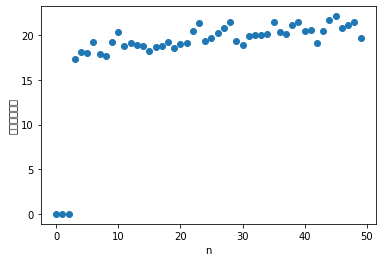

In [20]:
"""
通信の確立 固定経路
"""

import numpy as np
import scipy.sparse as ss
from scipy.sparse import csr_matrix
import pprint
import random
import matplotlib.pyplot as plt
#########################送受信ノードの決定###############################
def path_decide():
  nord = [0,1,2,3,4,5,6,7,8,9]
  num = random.sample(nord,2)
  start,end = num[0],num[1]
  return start,end
############################最短経路の取得############################
def get_path(start, goal, pred):
    return get_path_row(start, goal, pred[start])

def get_path_row(start, goal, pred_row):
    path = []
    i = goal
    while i != start and i >= 0:
        path.append(i)
        i = pred_row[i]
    if i < 0:
        return []
    path.append(i)
    return path[::-1]
############################初期値での最短経路の取得############################
def default_shotest_route(l):#(行、列)=(i,j)に最短格納されてる
  path_list = []
  d,p = ss.csgraph.dijkstra(l,return_predecessors=True,unweighted=True)
  for start in range(10):
    line_path_list = []
    for end in range(10):
      start = start #リストのインデックスに合わせてる
      end = end
      line_path_list.append(get_path(start,end,p))
    path_list.append(line_path_list)
  return path_list
############################つうしんの確立############################
def comm(path,l,path_list):
  global count
  l_copy = l
  for i in range(len(path)-1):#該当している辺の重みを－１する箇所
    pre_node,now_node = path[i],path[i+1] 
    if l_copy[pre_node][now_node] == 0: #空き容量のないリンクが現れた場合今回の変更をリセットして何も行わない
      #print(pre_node,now_node,"間の空き容量がありません。")
      path_list.append('FAIL')
      count += 1
      break
    else:#容量が開いていた場合、そのリンクの容量を1減らす
      l_copy[pre_node][now_node] -= 1
      l_copy[now_node][pre_node] -= 1
  l = l_copy #最後まで行けたらlを更新
  path_list.append(path)
  return l

 ############################通信の切断############################
def suspend(path_list,l):
  path = path_list[0]
  l_copy = l
  if path == 'FAIL':#n回前の通信が失敗してた時
    del path_list[0]
    return 0
  else:
    for i in range(len(path)-1):#該当している辺の重みを+１する箇所
      pre_node,now_node = path[i],path[i+1] 
      l_copy[pre_node][now_node] += 1 
      l_copy[now_node][pre_node] += 1
  l = l_copy #最後まで行けたらlを更新
  del path_list[0]
  return 0

def main(n):
   #n回前の通信を終了
  l = [[0,3,0,3,0,0,0,0,0,0],
      [3,0,3,4,0,0,0,0,0,0],
      [0,3,0,0,4,3,0,0,0,0],
      [3,4,0,0,5,0,0,3,0,0],
      [0,0,4,5,0,5,0,4,0,0],
      [0,0,3,0,5,0,3,0,4,0],
      [0,0,0,0,0,3,0,0,3,0],
      [0,0,0,3,4,0,0,0,4,3],
      [0,0,0,0,0,4,3,4,0,3],
      [0,0,0,0,0,0,0,3,3,0]
      ]
  path_list = []
  default_path_list = default_shotest_route(l)#(行、列)=(i,j)に最短格納されてる

  N = 10000 #通信の回数

  flag = False

  for i in range(N):
    start,end = path_decide()
    path = default_path_list[start][end]
    comm(path,l,path_list)
    if len(path_list) > n:
      flag = True
    if flag == True:
      suspend(path_list,l)
  kosonnritu = (count/N)*100
  
  print("n=",n,"N=",N,"呼損回数",count)
  print("呼損率:",kosonnritu,"%")
  return kosonnritu




count = 0
koson = [] #呼損率を入れる
n = 50
for i in range (n):
  print("a")
  koson.append(main(i))
  count = 0 #関数内でcountはグローバル変数で使ってしまったからここで0に更新しないと別のnになってるのにcountが繰り越されることになる。
x = range(0,n,1)
plt.scatter(x,koson)
plt.xlabel("n")
plt.ylabel("呼損率（％）")
plt.show()



/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65285 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_

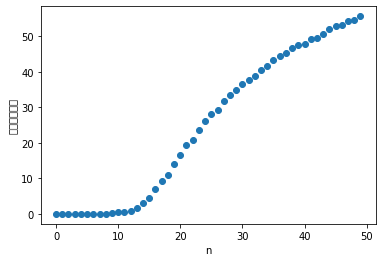

In [21]:
"""
通信の確立 要求時経路
"""
import numpy as np
import scipy.sparse as ss
from scipy.sparse import csr_matrix
import pprint
import random
import matplotlib.pyplot as plt

#########################送受信ノードの決定###############################
def path_decide():
  nord = [0,1,2,3,4,5,6,7,8,9]
  num = random.sample(nord,2)
  start,end = num[0],num[1]
  return start,end
############################最短経路の取得############################
def get_path(start, goal, pred):
    return get_path_row(start, goal, pred[start])

def get_path_row(start, goal, pred_row):
    path = []
    i = goal
    while i != start and i >= 0:
        path.append(i)
        i = pred_row[i]
    if i < 0:
        return []
    path.append(i)
    return path[::-1]
############################通信の確立############################
def comm(start,end,l,path_list):
  global count
  d,p = ss.csgraph.dijkstra(l,return_predecessors=True,unweighted=True) #経路選択
  path = get_path(start,end,p)
  l_copy = l
  if path == []:#経路がない場合
    #print("経路上に空きのないリンクがあります。")  
    path_list.append('FAIL')
    count = count + 1
    return 0
  else:
    for i in range(len(path)-1):#該当している辺の重みを－１する箇所
      pre_node,now_node = path[i],path[i+1] 
#容量が開いていた場合、そのリンクの容量を1減らす
      l_copy[pre_node][now_node] -= 1
      l_copy[now_node][pre_node] -= 1
    l = l_copy #最後まで行けたらlを更新
    path_list.append(path)
    #print("success")
    return 0
 ############################通信の切断############################
def suspend(path_list,l):
  l_copy = l
  path = path_list[0]
  if path == 'FAIL':#n回前の通信が失敗してた時
    del path_list[0]
    return 0
  else:
    for i in range(len(path)-1):#該当している辺の重みを+１する箇所
      pre_node,now_node = path[i],path[i+1] 
      l_copy[pre_node][now_node] += 1 
      l_copy[now_node][pre_node] += 1
  l = l_copy #最後まで行けたらlを更新
  del path_list[0]
  return 0

def main(n):
   #n回前の通信を終了
  l = [[0,3,0,3,0,0,0,0,0,0],
      [3,0,3,4,0,0,0,0,0,0],
      [0,3,0,0,4,3,0,0,0,0],
      [3,4,0,0,5,0,0,3,0,0],
      [0,0,4,5,0,5,0,4,0,0],
      [0,0,3,0,5,0,3,0,4,0],
      [0,0,0,0,0,3,0,0,3,0],
      [0,0,0,3,4,0,0,0,4,3],
      [0,0,0,0,0,4,3,4,0,3],
      [0,0,0,0,0,0,0,3,3,0]
      ]
  path_list = []

  N = 10000 #通信の回数

  flag = False

  for i in range(N):
    start,end = path_decide()
    comm(start,end,l,path_list)

    if len(path_list) > n:
      flag = True
    if flag == True:
      suspend(path_list,l)
  kosonnritu = (count/N)*100
  return kosonnritu
  """  
  print("n=",n,"N=",N,"呼損回数",count)
  print("呼損率:",kosonnritu,"%")
  """

count = 0
koson = [] #呼損率を入れる
n = 50
for i in range (n):
  koson.append(main(i))
  count = 0 #関数内でcountはグローバル変数で使ってしまったからここで0に更新しないと別のnになってるのにcountが繰り越されることになる。
x = range(0,n,1)
plt.scatter(x,koson)
plt.xlabel("n")
plt.ylabel("呼損率（％）")
plt.show()

In [0]:
"""
通信の切断
"""
import pprint
def comm(start,end,l):
  start,end = 0,9
  d,p = ss.csgraph.dijkstra(l,return_predecessors=True)
  path = get_path(start,end,p)
  print(path)
  l_copy = l
  for i in range(len(path)-1):#該当している辺の重みを－１する箇所
    pre_node,now_node = path[i],path[i+1] 
    if l_copy[pre_node][now_node] == 0: #空き容量のないリンクが現れた場合今回の変更をリセットして何も行わない
      print(pre_node,now_node,"間の空き容量がありません。")
      break
    else:#容量が開いていた場合、そのリンクの容量を1減らす
      l_copy[pre_node][now_node] += 1
      l_copy[now_node][pre_node] += 1
  l = l_copy #最後まで行けたらlを更新
  pprint.pprint(l)